In [83]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [84]:
train = pd.read_csv('../input/slashing-prices/Train.csv')

In [85]:
test=pd.read_csv('../input/slashing-prices/Test.csv')

In [86]:
train.head()

,Item_Id,Date,State_of_Country,Market_Category,Product_Category,Grade,Demand,Low_Cap_Price,High_Cap_Price
0,IT_1,2007-07-05,0,0,0,0,0.5,2785,4240
1,IT_2,2007-07-05,0,1,0,0,0.7,3574,4756
2,IT_3,2007-07-05,0,103,0,1,1.6,5978,9669
3,IT_4,2007-07-05,0,103,0,0,0.0,5681,8313
4,IT_5,2007-07-05,0,103,0,2,0.0,4924,7257


In [87]:
test.head()

,Item_Id,Date,State_of_Country,Market_Category,Product_Category,Grade,Demand,High_Cap_Price
0,IT_265079,2014-01-19,0,3,0,0,0.1,5303
1,IT_265087,2014-01-19,0,268,0,2,1.4,10492
2,IT_265107,2014-01-19,0,320,0,0,13.4,24706
3,IT_265139,2014-01-19,17,358,0,3,5.5,23464
4,IT_265142,2014-01-19,18,23,5,2,0.0,6222


In [88]:
train.tail()

,Item_Id,Date,State_of_Country,Market_Category,Product_Category,Grade,Demand,Low_Cap_Price,High_Cap_Price
9793,IT_95425,2010-06-08,20,255,0,2,30.4,124,604
9794,IT_95456,2010-06-08,9,60,1,3,1480.0,225,1461
9795,IT_95457,2010-06-08,21,37,1,2,24.4,4721,6637
9796,IT_95472,2010-06-08,21,469,0,0,2.3,5082,6997
9797,IT_95488,2010-06-09,0,3,0,0,0.5,3899,6380


In [89]:
test.tail()

,Item_Id,Date,State_of_Country,Market_Category,Product_Category,Grade,Demand,High_Cap_Price
5758,IT_361691,2015-09-29,21,375,10,0,3.4,10925
5759,IT_361694,2015-09-29,21,310,13,0,1.8,9089
5760,IT_361699,2015-09-29,21,445,10,0,0.2,9656
5761,IT_361719,2015-09-29,21,452,13,0,3.4,8070
5762,IT_361723,2015-09-29,21,360,10,0,1.4,11309


In [90]:
print(test.nunique())
print()
print(train.nunique())

Item_Id             5763
Date                 617
State_of_Country      20
Market_Category      240
Product_Category      17
Grade                  4
Demand               860
High_Cap_Price      4781
dtype: int64

Item_Id             9798
Date                1070
State_of_Country      21
Market_Category      275
Product_Category      17
Grade                  4
Demand              1207
Low_Cap_Price       5392
High_Cap_Price      6468
dtype: int64


In [91]:
categorical_feats= ['Item_Id','Date']
numerical_feats = []
for col in train.columns:
    if col not in categorical_feats:
        numerical_feats.append(col)
numerical_feats

['State_of_Country',
 'Market_Category',
 'Product_Category',
 'Grade',
 'Demand',
 'Low_Cap_Price',
 'High_Cap_Price']

In [92]:
train[numerical_feats].describe()

,State_of_Country,Market_Category,Product_Category,Grade,Demand,Low_Cap_Price,High_Cap_Price
count,9798.000000,9798.000000,9798.000000,9798.000000,9798.000000,9798.000000,9798.000000
mean,14.278730,198.414064,2.492958,0.652072,71.977414,3500.273525,6349.838028
std,8.760964,169.767862,4.751807,1.032439,927.194052,2188.046803,3652.780956
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,163.000000
25%,3.000000,55.000000,0.000000,0.000000,0.500000,1863.250000,3878.250000
50%,20.000000,129.000000,0.000000,0.000000,2.000000,3124.000000,5552.500000
75%,21.000000,389.000000,1.000000,2.000000,10.175000,4667.500000,7993.750000
max,23.000000,471.000000,17.000000,3.000000,64160.500000,17580.000000,58812.000000


In [93]:
numerical_feats_test=numerical_feats[:5]
numerical_feats_test.append(numerical_feats[-1])
test[numerical_feats_test].describe()

,State_of_Country,Market_Category,Product_Category,Grade,Demand,High_Cap_Price
count,5763.000000,5763.000000,5763.000000,5763.00000,5763.000000,5.763000e+03
mean,15.926080,222.169356,4.547978,0.39823,67.695471,3.732109e+04
std,8.122655,145.683245,5.485450,0.81668,486.501858,1.998985e+06
min,0.000000,0.000000,0.000000,0.00000,0.000000,1.000000e+00
25%,11.500000,65.000000,0.000000,0.00000,0.600000,7.244000e+03
50%,21.000000,238.000000,1.000000,0.00000,2.300000,9.364000e+03
75%,21.000000,340.000000,10.000000,0.00000,8.400000,1.256250e+04
max,23.000000,471.000000,17.000000,3.00000,13242.600000,1.517609e+08


Low_Cap_Price       1.000000
High_Cap_Price      0.721021
State_of_Country    0.234901
Market_Category     0.198524
Product_Category    0.180240
Demand             -0.057482
Grade              -0.079639
Name: Low_Cap_Price, dtype: float64

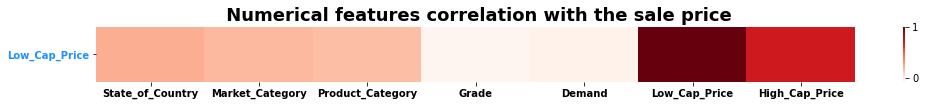

In [94]:
#checking correlation

num=train.select_dtypes(exclude='object')
numcorr=num.corr()
f,ax=plt.subplots(figsize=(17,1))
sns.heatmap(numcorr.sort_values(by=['Low_Cap_Price'], ascending=False).head(1), cmap='Reds')
plt.title(" Numerical features correlation with the sale price", weight='bold', fontsize=18)
plt.xticks(weight='bold')
plt.yticks(weight='bold', color='dodgerblue', rotation=0)
numcorr['Low_Cap_Price'].sort_values(ascending=False)

High Cap Price is the most correlated feature, i.e, it'll have the max weight in predicting the low cap price.

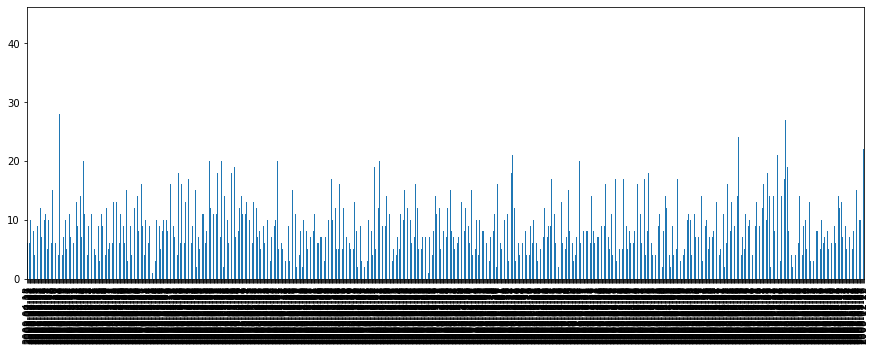

In [95]:
train['Date'].value_counts(sort=False).plot.bar(figsize=(15,5))

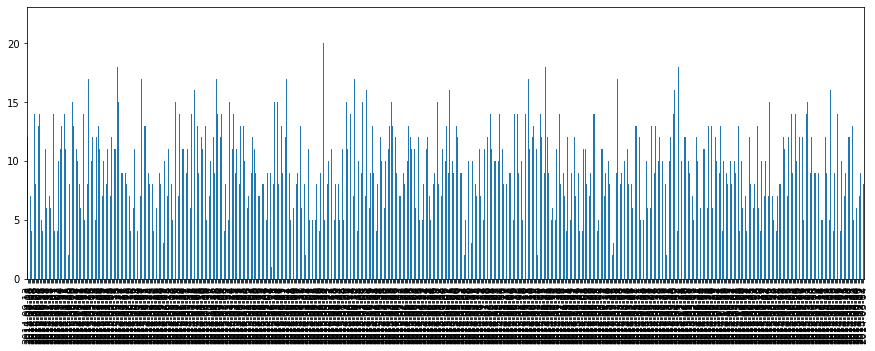

In [96]:
test['Date'].value_counts(sort=False).plot.bar(figsize=(15,5))

There is some kind of trend. Peaks can easily be seen

In [97]:
res = set.intersection(*(set(df['Product_Category']) for df in [train,test]))
res

{0, 1, 3, 4, 5, 6, 7, 9, 10, 11, 12, 13, 14, 15, 16, 17}

Present in train but not in test: 8

Present in test but not in train: 2

train


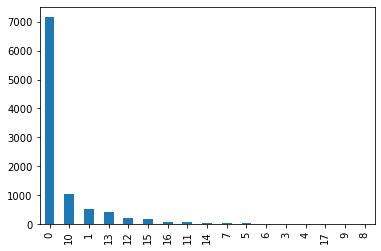

In [98]:
train['Product_Category'].value_counts().plot.bar()
print('train')

test


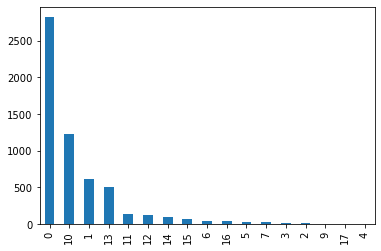

In [99]:
test['Product_Category'].value_counts().plot.bar()
print('test')

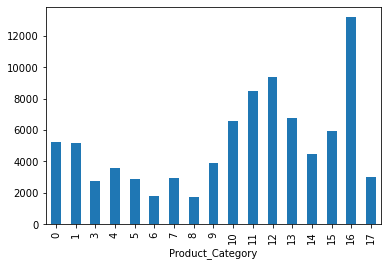

In [100]:
train.groupby('Product_Category')['High_Cap_Price'].median().plot.bar()

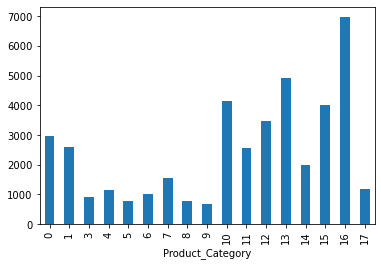

In [101]:
train.groupby('Product_Category')['Low_Cap_Price'].median().plot.bar()

Low Cap price moves quite similarly to high cap in most product categories

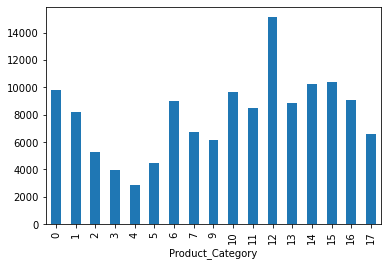

In [102]:
test.groupby('Product_Category')['High_Cap_Price'].median().plot.bar()

The product category '0' isthe most abundant and is 7 times more than second most abundant category '10'(in train set). What can be the reason for this? Have they filled null values with 0? It might be possible that the products whose category is unknown have been marked '0' randomly.

In [103]:
unique_train=train[numerical_feats[0]].unique()
unique_train.sort()
print(unique_train)

[ 0  1  2  3  4  5  6  7  8  9 10 11 13 14 17 18 19 20 21 22 23]


In [104]:
unique_test=test[numerical_feats[0]].unique()
unique_test.sort()
print(unique_test)

[ 0  1  2  3  4  5  6  7  8  9 11 12 15 17 18 19 20 21 22 23]


In [105]:
res = set.intersection(*(set(df[numerical_feats[0]]) for df in [train,test]))
res

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 11, 17, 18, 19, 20, 21, 22, 23}

1) Present in train but not in test: 10, 13, 14

2) Present in test but not in train: 12, 15

Train


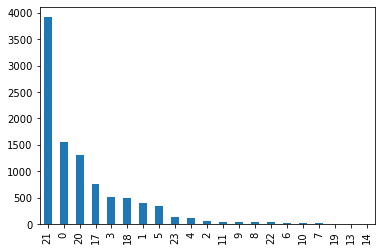

In [106]:
train[numerical_feats[0]].value_counts().plot.bar()
print('Train')


Test


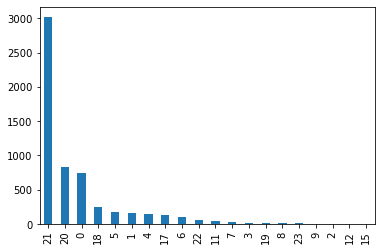

In [107]:
test[numerical_feats[0]].value_counts().plot.bar()
print('Test')

But from the graph we can easily see that uncommon elements belong to right side, i.e., they're scarce. So, they wont be affecting that much badly!! :D

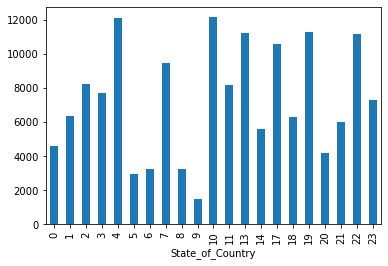

In [108]:
train.groupby(numerical_feats[0])['High_Cap_Price'].median().plot.bar()

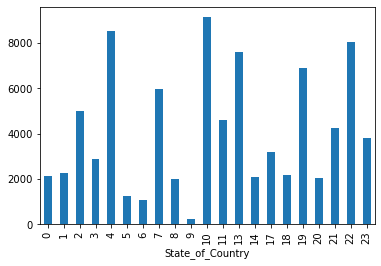

In [109]:
train.groupby(numerical_feats[0])['Low_Cap_Price'].median().plot.bar()

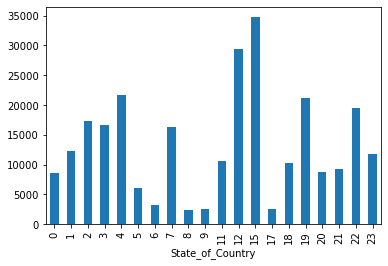

In [110]:
test.groupby(numerical_feats[0])['High_Cap_Price'].median().plot.bar()

the plots are quite similar in first 0-9 state_of_country and 18-23

train


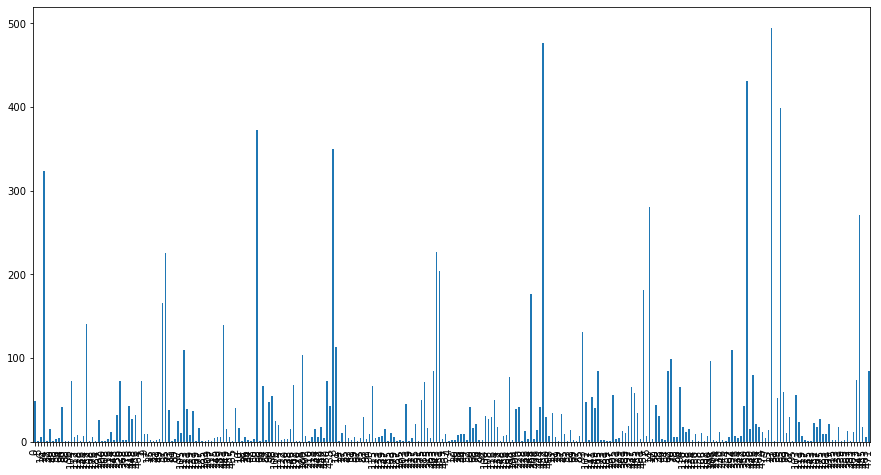

In [111]:
train[numerical_feats[1]].value_counts(sort=False).plot.bar(figsize=(15,8))
print('train')

test


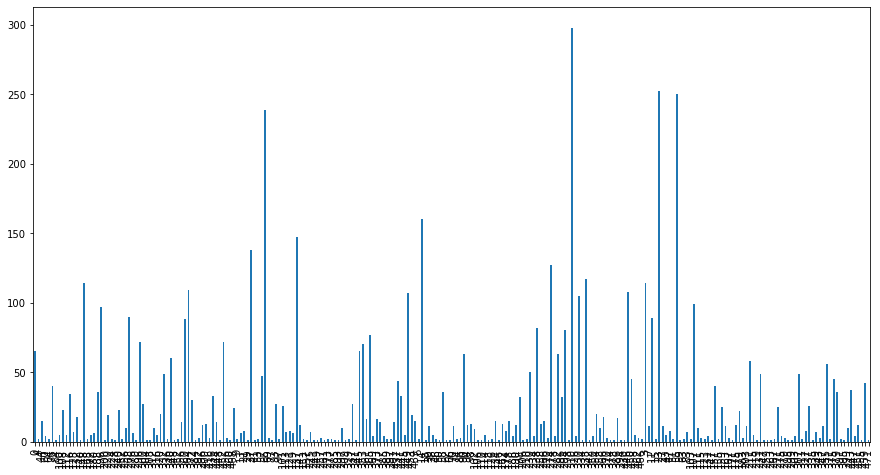

In [112]:
test[numerical_feats[1]].value_counts(sort=False).plot.bar(figsize=(15,8))
print('test')

the peaks are interesting to note. Means some market types are more abundant on the site.

train


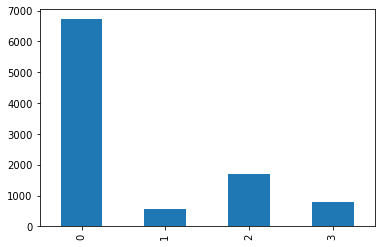

In [113]:
train[numerical_feats[3]].value_counts(sort=False).plot.bar()
print('train')

test


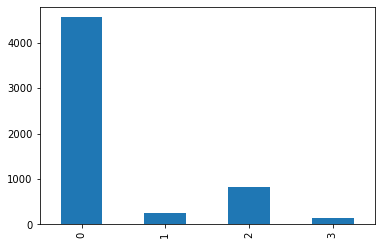

In [114]:
test[numerical_feats[3]].value_counts(sort=False).plot.bar()
print('test')

since grade has -ve correlation to low cap price, that means as grade inc, the low cap price decreases(all other features remain constant), therefore, we may reason that grade=0 is best quality and grade=3 is the worst.

Demand


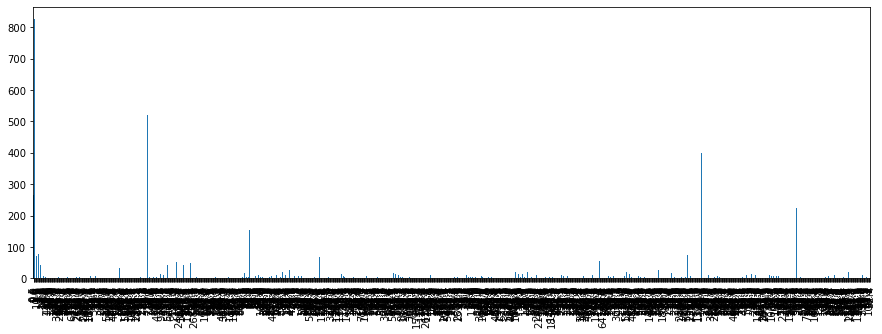

In [115]:
train[numerical_feats[4]].value_counts(sort=False).plot.bar(figsize=(15,5))
print(numerical_feats[4])

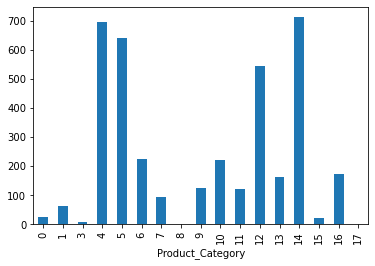

In [116]:
train.groupby('Product_Category')['Demand'].mean().plot.bar()

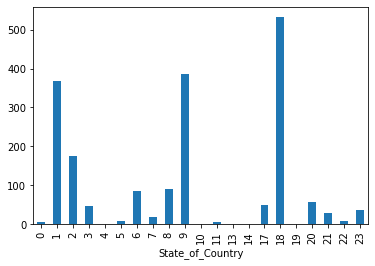

In [117]:
train.groupby('State_of_Country')['Demand'].mean().plot.bar()

some peaks. But, demand has very little effect on low cap prices. Quite shockingly, -ve correlation means when demand increases, the prices fall by very little amount(all other features remain constant).

NOTE: correlation doesn't imply causation

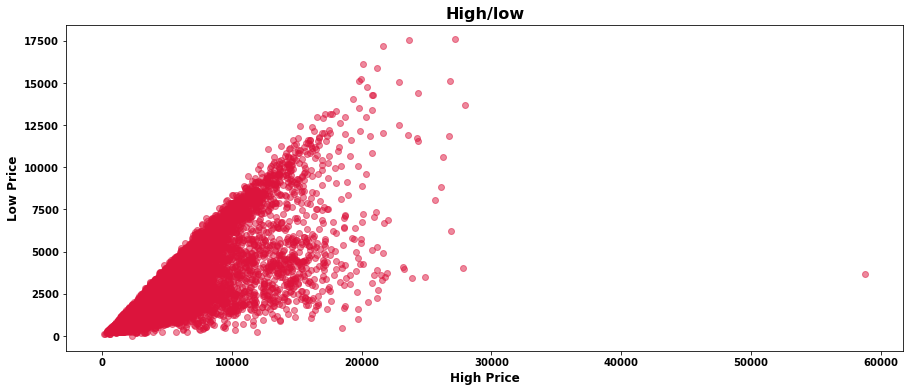

In [118]:
plt.figure(figsize=(15,6))
plt.scatter(x=train['High_Cap_Price'], y=train['Low_Cap_Price'], color='crimson', alpha=0.5)
plt.title('High/low', weight='bold', fontsize=16)
plt.xlabel('High Price', weight='bold', fontsize=12)
plt.ylabel('Low Price', weight='bold', fontsize=12)
plt.xticks(weight='bold')
plt.yticks(weight='bold')
plt.show()

Hmmm, interesting, something triangle like figure is formed. Another interesting thing to note is that when max=60k, then also, the low price is quite low. 

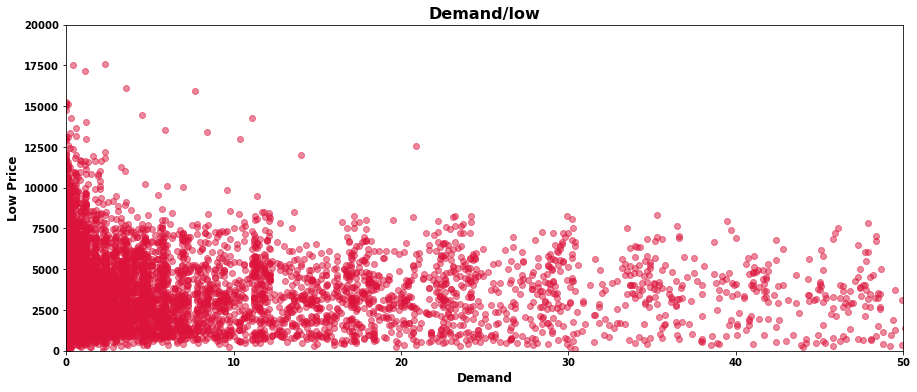

In [119]:
plt.figure(figsize=(15,6))
plt.scatter(x=train['Demand'], y=train['Low_Cap_Price'], color='crimson', alpha=0.5)
plt.title('Demand/low', weight='bold', fontsize=16)
plt.xlabel('Demand', weight='bold', fontsize=12)
plt.ylabel('Low Price', weight='bold', fontsize=12)
plt.xticks(weight='bold')
plt.yticks(weight='bold')
plt.axis([0, 50,0,20000])
plt.show()

In [120]:
#Let's set the threshold as 40(this is totally experimental), and categorize as low demand and high demand.
train['low_high']=train['Demand']>=40

In [121]:
test['low_high']=test['Demand']>=40

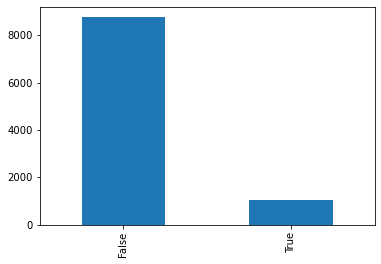

In [122]:
train['low_high'].value_counts().plot.bar()

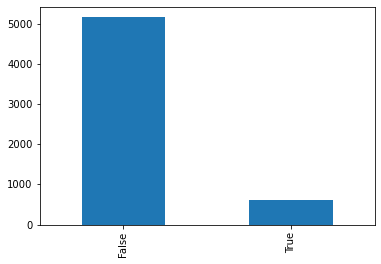

In [123]:
test['low_high'].value_counts().plot.bar()

Here, false just means low demand and true means high demand. 

Since, the date is not in continuation to the train data or something, so, we only need to extract some features from date. Because all the dates in test set are different from training data and it's not a time series as well. Let's check the plot for date.

In [124]:
from datetime import datetime  
train['Date'] = pd.to_datetime(train.Date,format='%Y-%m-%d') 
test['Date'] = pd.to_datetime(test.Date,format='%Y-%m-%d')
for i in (train, test):
    i['year']=i.Date.dt.year 
    i['month']=i.Date.dt.month 
    i['day']=i.Date.dt.day
   

In [125]:
train['day of week']=train['Date'].dt.dayofweek 
temp = train['Date']
test['day of week']=test['Date'].dt.dayofweek 

In [126]:
def applyer(row):
    if row.dayofweek ==4 or row.dayofweek == 5 or row.dayofweek == 6:
        return 1
    else:
        return 0 
temp2 = train['Date'].apply(applyer) 
train['weekend']=temp2

In [127]:
temp3 = test['Date'].apply(applyer) 
test['weekend']=temp3

Low_Cap_Price       1.000000
High_Cap_Price      0.721021
month               0.281381
State_of_Country    0.234901
Market_Category     0.198524
Product_Category    0.180240
weekend             0.014422
day of week         0.006135
year                0.001937
day                -0.014920
Demand             -0.057482
Grade              -0.079639
low_high           -0.120339
Name: Low_Cap_Price, dtype: float64

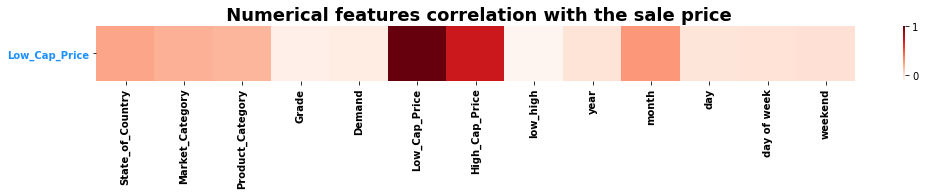

In [128]:
num=train.select_dtypes(exclude='object')
numcorr=num.corr()
f,ax=plt.subplots(figsize=(17,1))
sns.heatmap(numcorr.sort_values(by=['Low_Cap_Price'], ascending=False).head(1), cmap='Reds')
plt.title(" Numerical features correlation with the sale price", weight='bold', fontsize=18)
plt.xticks(weight='bold')
plt.yticks(weight='bold', color='dodgerblue', rotation=0)
numcorr['Low_Cap_Price'].sort_values(ascending=False)

So, we generated some good features. But, I thought weekend to be a great metric to offer discounts, but looks, that's not the case. Let's drop Date, day, year, demand, day of week

In [129]:
train.head()

,Item_Id,Date,State_of_Country,Market_Category,Product_Category,Grade,Demand,Low_Cap_Price,High_Cap_Price,low_high,year,month,day,day of week,weekend
0,IT_1,2007-07-05,0,0,0,0,0.5,2785,4240,False,2007,7,5,3,0
1,IT_2,2007-07-05,0,1,0,0,0.7,3574,4756,False,2007,7,5,3,0
2,IT_3,2007-07-05,0,103,0,1,1.6,5978,9669,False,2007,7,5,3,0
3,IT_4,2007-07-05,0,103,0,0,0.0,5681,8313,False,2007,7,5,3,0
4,IT_5,2007-07-05,0,103,0,2,0.0,4924,7257,False,2007,7,5,3,0


In [130]:
train.drop(['Date','Demand','year','Item_Id', 'day of week', 'day'],axis=1,inplace=True)
test.drop(['Date','Demand','year','Item_Id', 'day of week', 'day'],axis=1,inplace=True)

In [131]:
from sklearn.preprocessing import MinMaxScaler
scaler= MinMaxScaler()
scaler.fit(train.drop(['Low_Cap_Price'],axis=1))
scaled_features_train= scaler.transform(train.drop('Low_Cap_Price',axis=1))

In [132]:
from sklearn.preprocessing import MinMaxScaler
scaler= MinMaxScaler()
scaler.fit(test)
scaled_features_train= scaler.transform(test)

In [133]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9798 entries, 0 to 9797
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   State_of_Country  9798 non-null   int64
 1   Market_Category   9798 non-null   int64
 2   Product_Category  9798 non-null   int64
 3   Grade             9798 non-null   int64
 4   Low_Cap_Price     9798 non-null   int64
 5   High_Cap_Price    9798 non-null   int64
 6   low_high          9798 non-null   bool 
 7   month             9798 non-null   int64
 8   weekend           9798 non-null   int64
dtypes: bool(1), int64(8)
memory usage: 622.1 KB


In [134]:
from sklearn.model_selection import train_test_split, cross_val_score
X= train[['State_of_Country','Market_Category','Product_Category','Grade','High_Cap_Price','low_high','month','weekend']]
y= train['Low_Cap_Price'] 

In [135]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=101)

In [136]:
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [137]:
models=[]
models.append(('DTC',DecisionTreeRegressor()))
models.append(('KNC',KNeighborsRegressor()))
#models.append(('LR',LinearRegression()))
models.append(('RFC',RandomForestRegressor()))
#models.append(("MLP",MLPRegressor()))
models.append(("GBC",GradientBoostingRegressor()))

In [138]:
names=[]
for name,algo in models:
    algo.fit(X_train,y_train)
    prediction= algo.predict(X_test)
    a= metrics.mean_squared_log_error(y_test,prediction) 
    print("%s: %f "%(name, a))

DTC: 0.129753 
KNC: 0.160254 
RFC: 0.061600 
GBC: 0.103361 


In [139]:
rm= RandomForestRegressor(random_state=22, n_estimators=400)

In [140]:
rm.fit(X_train,y_train)

RandomForestRegressor(n_estimators=400, random_state=22)

In [141]:
X_= test[['State_of_Country','Market_Category','Product_Category','Grade','High_Cap_Price','low_high','month','weekend']]

In [142]:
prediction = rm.predict(X_)

In [143]:
rm2= RandomForestRegressor(random_state=101, n_estimators=400)

In [144]:
rm2.fit(X_train, y_train)

RandomForestRegressor(n_estimators=400, random_state=101)

In [145]:
prediction2= rm2.predict(X_)

In [146]:
gb= GradientBoostingRegressor(random_state=101, n_estimators=400)

In [147]:
gb.fit(X_train,y_train)

GradientBoostingRegressor(n_estimators=400, random_state=101)

In [148]:
pred=gb.predict(X_)

In [149]:
gb2= GradientBoostingRegressor(random_state=101, n_estimators=400)

In [150]:
gb2.fit(X_train,y_train)

GradientBoostingRegressor(n_estimators=400, random_state=101)

In [151]:
pred2=gb2.predict(X_)

In [152]:
gb3= GradientBoostingRegressor(random_state=101, n_estimators=400)

In [153]:
gb3.fit(X_train,y_train)

GradientBoostingRegressor(n_estimators=400, random_state=101)

In [154]:
pred3=gb3.predict(X_)

In [155]:
gb4= GradientBoostingRegressor()
gb4.fit(X_train,y_train)
pred4=gb4.predict(X_)

In [156]:
gb5= GradientBoostingRegressor()
gb5.fit(X_train,y_train)
pred5=gb5.predict(X_)

Here I'll use the average output of these 7 models. This is known as Ensemble learning.

In [157]:
pre=(prediction+prediction2+pred+pred2+pred3+pred4+pred5)/7

I submitted 'pre' for the contest and got 39 rank on the public leaderboard out of 600+ submissions. There's a lot you can explore.


**IF YOU LIKED THE NOTEBOOK, THEN DO UPVOTE :)**